## 3 Course 1.1.9 What If Practical Activity

Your client, age 55, wants to retire when his wealth exceeds £2 million. His current salary of £250,000, the cost of living of 3%, a savings rate of 15%, an interest rate of 5%, and 2 promotions per year at a promotion raise of 10%. 

Will your client be able to retire at age 65? To prepare your findings for presentation, you now need to summarise your results and visualise the change in wealth over time for the client. 

In [1]:
# Defines classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd

# Import in-built module for generating random numbers. 
import random 

# Display output inline.
%matplotlib inline

# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer

### Define the Model Inputs

In [3]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int =250000
    promos_every_n_years: int = 2
    cost_of_living_raise: float = 0.03
    promo_raise: float = 0.10
    savings_rate: float = 0.15
    interest_rate: float = 0.05
    desired_cash: int = 2000000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data

ModelInputs(starting_salary=250000, promos_every_n_years=2, cost_of_living_raise=0.03, promo_raise=0.1, savings_rate=0.15, interest_rate=0.05, desired_cash=2000000)

### Determine the probable wages each year

In [4]:
# Calculate wage at a given year from start of the model based on cost of living, 
# raises and regular promotion.
def wages_year(data: ModelInputs, year)->float:
    """
    Gets the wage at a given year from the start of the model based 
    on cost of living raises and regular promotions.
    """
    # Every n years we have a promotion, so dividing the years and taking 
    # out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)
    
    # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

The wage at year 1 is £257,500.
The wage at year 2 is £291,748.
The wage at year 3 is £300,500.
The wage at year 4 is £340,466.


### Calculate the cash saved for a given year

In [8]:
def cash_saved_during_year(data: ModelInputs, year):
    """
    Calculated the cash saved within a given year, by first 
    calculating the salary at that year then applying the 
    savings rate.
    """
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

### Calculate the accumlated wealth for a given year

In [9]:
def wealth_year(data: ModelInputs, year, prior_wealth):
    """
    Calculate the accumulated wealth for a given year, 
    based on previous wealth, the investment rate,
    and cash saved during the year.
    """
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

### Start with no cash saved

In [10]:
# Starting with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth.
    prior_wealth = wealth

The wealth at year 1 is £38,625.
The wealth at year 2 is £84,318.
The wealth at year 3 is £133,609.
The wealth at year 4 is £191,360.


### Run the retirement model

In [11]:
# Runs the retirement model; collects salary and wealth information year by year
# and stores it in a DataFrame for further analysis.
def get_salaries_wealths_df(data):
    # Start with no cash saved.
    prior_wealth = 0   
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  

    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)

         # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth 

        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, salary, wealth))
        
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [12]:
# Format DataFrame for display.
get_salaries_wealths_df(model_data)

,Year,Salary,Wealth
0,1,2.575000e+05,3.862500e+04
1,2,2.917475e+05,8.431838e+04
2,3,3.004999e+05,1.336093e+05
3,4,3.404664e+05,1.913597e+05
4,5,3.506804e+05,2.535298e+05
5,6,3.973209e+05,3.258044e+05
6,7,4.092405e+05,4.034807e+05
7,8,4.636695e+05,4.932051e+05
8,9,4.775796e+05,5.895023e+05
9,10,5.410977e+05,7.001421e+05


In [13]:
# Save the function results into the DataFrame.
results_df = get_salaries_wealths_df(model_data)

# View the DataFrame.
results_df.head()

,Year,Salary,Wealth
0,1,257500.000000,38625.000000
1,2,291747.500000,84318.375000
2,3,300499.925000,133609.282500
3,4,340466.415025,191359.708879
4,5,350680.407476,253529.755444


### Create visualisation

<AxesSubplot:xlabel='Year'>

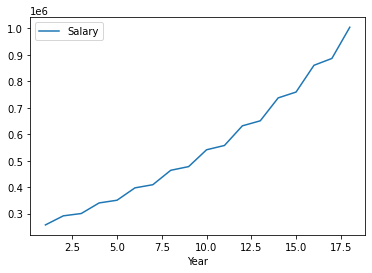

In [18]:
# Visualise wage or salary change over time.
results_df.plot( 'Year' , 'Salary')

<AxesSubplot:xlabel='Year'>

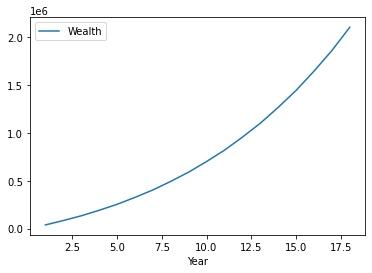

In [19]:
# Visualise wealth change over time.
results_df.plot( 'Year' , 'Wealth')

Calculations show that it will take 17.5 years to accumlated the desired retirement wealth. Whilst wealth increasing steadily over time, it can be observed that salary rate increases fluctuate in rate reflecting promotions that are predicted to occur every 2 years.